In [47]:
import os
import numpy             as     np
import astropy.io.fits   as     fits
import pylab             as     pl

from   IPython.display   import YouTubeVideo
from   scipy             import interpolate
from   scipy             import optimize
from   spectres          import spectres
from   tools.wave2rgb    import wavelength_to_rgb

# A snow white dwarf

When you look to the sky, who knows what you will find?  We're all familiar with our own sun, 

<img src="images/sun.jpg" alt="Drawing" style="width: 800px;"/>

a seemingly ever present that we see continually day-to-day.  Would it surprise you to know that in _5.5 billion years_ the sun will change beyond recognition as the Hydrogen fuelling nuclear fusion within expires?  

<img src="images/RedGiant.jpg" alt="Drawing" style="width: 800px;"/>

During this apparent mid-life crisis, the sun fuses Helium to create the carbon fundamental to life on earth, and the oxygen necessary to sustain it.  Expanding to ten-to-hundreds the size of our own sun, it will soon envelope Mercury & Venus, and perhaps [even Earth itself](https://phys.org/news/2016-05-earth-survive-sun-red-giant.html#:~:text=Red%20Giant%20Phase%3A,collapses%20under%20its%20own%20weight.), and eventual explode as a spectacular planetary nebulae: 

<img src="images/PlanetaryNebulae.jpg" alt="Drawing" style="width: 800px;"/>

The ashen carbon-oxygen survives as a fossilised ancient, dissipating energy just slowly enough that it will continue to survive for another 13.8 billion years, the present age of our Universe, and see in countless new millenia.

We can learn about this eventual fate of the sun, and its impact on Earth, by studying neighbouring White Dwarves in the Milky Way.  We'll look at one such candidate that DESI very recently observed:

In [91]:
# Load the DESI spectrum
zbest = fits.open('student_andes/zbest-mws-66003-20200315-wd.fits')[1]
coadd = fits.open('student_andes/coadd-mws-66003-20200315-wd.fits')

In [92]:
# Get its position on the sky:
ra, dec = float(zbest.data['TARGET_RA']), float(zbest.data['TARGET_DEC'])

It's position on the night sky lies just above the familiar [Ursa Marjor](https://en.wikipedia.org/wiki/Ursa_Major) or Great Bear,

<img src="images/UrsaMajor.jpg" alt="Drawing" style="width: 800px;"/>

familiar in the night sky:

<img src="images/UrsaMajor2.png" alt="Drawing" style="width: 800px;"/>

If you were to stare long enough, you'd see an almost imperceptible change in the apparent position as the our view changes as the Earth orbits the Sun.  This is just enough, given a precise enough instrument to calculate its distance given simple trigonometry you've likely already seen:  

<img src="images/PDistance.jpg" alt="Drawing" style="width: 800px;"/>

The GAIA space satellite was precisely designed to map one billion stars in the Milky Way, roughly one in every hundred, in this way.

<img src="images/Gaia.jpg" alt="Drawing" style="width: 800px;"/>

# Convert GAIA parallax to (rough) observed-on-sky in deg. here?

In [31]:
# Distance calculated from Gaia parallax (Bailer-Jones et al. 2018)
dist_para = 784.665266     # parcsecs

parsec    = 3.085677581e16 # m 

# Distance between the Sun and the Earth
au        = 1.495978707e11 # m

In [32]:
print('GAIA parallax tells us that the distance to our White Dwarf is {:.0f} million x the distance from the Earth to the Sun.'.format(dist_para * parsec / au / 1.e6))

GAIA parallax tells us that the distance to our White Dwarf is 162 million x the distance from the Earth to the Sun.


The camera GAIA is designed to hold allows measurement of the light intensity of the white dwarf in three different parts of the visible spectrum, corresponding to the colors shown below.  You'll recognise this as the same style plot we explored for Hydrogen Rydberg lines in the Intro.

In [76]:
# (Pivot) Wavelengths for the Gaia DR2 filters.
GAIA = {'G_WAVE': 6230.6, 'BP_WAVE': 5051.5, 'RP_WAVE': 7726.2}

(380.0, 780.0)

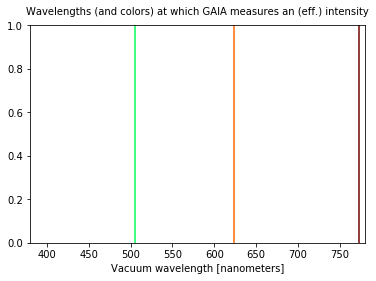

In [97]:
for wave in GAIA.values():
  # color = [r, g, b]
  color = wavelength_to_rgb(wave / 10.)       
  pl.axvline(x=wave / 10., c=color)

pl.title('Wavelengths (and colors) at which GAIA measures an (eff.) intensity', pad=10.5, fontsize=10)
pl.xlabel('Vacuum wavelength [nanometers]')
pl.xlim(380., 780.)

In [78]:
for band in ['G', 'BP', 'RP']:
    GAIA[band + '_MAG']  = zbest.data['GAIA_PHOT_{}_MEAN_MAG'.format(band)][0]    
    GAIA[band + '_FLUX'] = 10.**(-(GAIA[band + '_MAG'] + (25.7934 - 25.6884)) / 2.5) * 3631. / 3.34e4 / GAIA[band + '_WAVE']**2.

In [98]:
# Add in the mag. errors that DESI catalogues don't propagate.
GAIA['G_MAGERR']  = 0.0044
GAIA['BP_MAGERR'] = 0.0281
GAIA['RP_MAGERR'] = 0.0780

In [105]:
for key, value in GAIA.items():
    print('{:10s} \t {:05.4f}'.format(key, value))

G_WAVE     	 6230.6000
BP_WAVE    	 5051.5000
RP_WAVE    	 7726.2000
G_MAG      	 19.5145
G_FLUX     	 0.0000
BP_MAG     	 19.3481
BP_FLUX    	 0.0000
RP_MAG     	 19.7099
RP_FLUX    	 0.0000
G_MAGERR   	 0.0044
BP_MAGERR  	 0.0281
RP_MAGERR  	 0.0780


This combination of a measurement of distance, from parallax, and of apparent brightness (in a number of bands) is incredibly powerful, as together they tell us the intrinsic luminosity or birghtness of the dwarf, from which we can determine what mechanism could potentially be responsible.   

# DESI

By resolving the subtle variations in the amount of light with wavelength, DESI gives us a much better idea of the White Dwarf composition and its history.

In [113]:
# Get the wavelength and flux
wave  = coadd[1].data['WAVELENGTH']
count = coadd[1].data['TARGET35191335094848528']

Text(0.5, 1.0, 'TARGET35191335094848528')

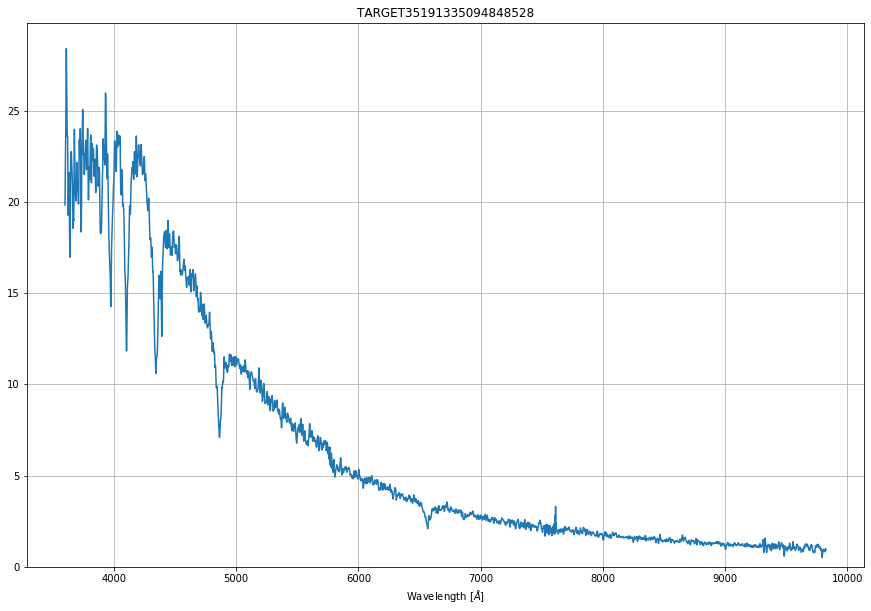

In [114]:
# Plotting the DESI spectrum
pl.figure(figsize=(15, 10))
pl.plot(wave, count)
pl.grid()
pl.xlabel('Wavelength $[\AA]$')
pl.ylim(ymin=0.)
pl.title('TARGET35191335094848528')

Same type of objects have the same spectral energy distribution, i.e. spectrum. By having these objects at a known distance from the trionometric parallax, we know the normalisation of the spectrum, i.e. the luminosity. Through fitting both the shape and the normalisation of the observed spectrum with template or model spectra, we can obtain the object properties including the distance - the spectroscopic distance.

In [107]:
# YouTubeVideo('sQbtjUgIVhg', width=800, height=400)

The photometric [models](http://www.astro.umontreal.ca/~bergeron/CoolingModels/) we use are for a pure-hydrogen atmosphere and the Gaia passbands, while the spectral models are taken from [Levenhagen 2017](https://ui.adsabs.harvard.edu/abs/2017ApJS..231....1L).

The photometric data and the [computed distance](https://ui.adsabs.harvard.edu/abs/2018AJ....156...58B/) can be found at the [Gaia Archive](https://gea.esac.esa.int/archive/) or [CDS Vizier](http://vizier.u-strasbg.fr/).

### Model Gaia photometry - what is DA?

In [115]:
# Load the pure hydrogen atmosphere WD model (DA white dwarf)
model_phot_da = np.genfromtxt('dat/WDphot/Table_DA.txt', skip_header=2)

# Eff. temperature.
T_da    = model_phot_da[:,0]

# Surface gravity.
logg_da = model_phot_da[:,1]

# Mass
mass_da = model_phot_da[:,2]

# apparent bolometric magnitude?
mbol_da = model_phot_da[:,3]

# GAIA passbands. 
G_da    = model_phot_da[:,-6]
Gbp_da  = model_phot_da[:,-5]
Grp_da  = model_phot_da[:,-4]

In [116]:
# Interpolate between the models on the grid.
G_interpolator_da   = interpolate.CloughTocher2DInterpolator((T_da, logg_da), G_da,   rescale=True)
Gbp_interpolator_da = interpolate.CloughTocher2DInterpolator((T_da, logg_da), Gbp_da, rescale=True)
Grp_interpolator_da = interpolate.CloughTocher2DInterpolator((T_da, logg_da), Grp_da, rescale=True)

### Model DA spectra

In [117]:
spec_da_list       = os.listdir('dat/WDspec/')
model_flux_spec_da = []
model_wave_spec_da = []

T_spec_da    = []
logg_spec_da = []

for filename in spec_da_list:
    if filename[-4:] != '.npz':
        continue
    model = np.load('dat/WDspec/' + filename)['arr_0']
    model_flux_spec_da.append(model[:,1])
    model_wave_spec_da.append(model[:,0])
    T, logg = filename.split('.')[0].split('t0')[-1].split('g')
    T_spec_da.append(float(T) * 1000.)
    logg_spec_da.append(float(logg[:-1]) / 10.)

## Find the best-fit spectral model

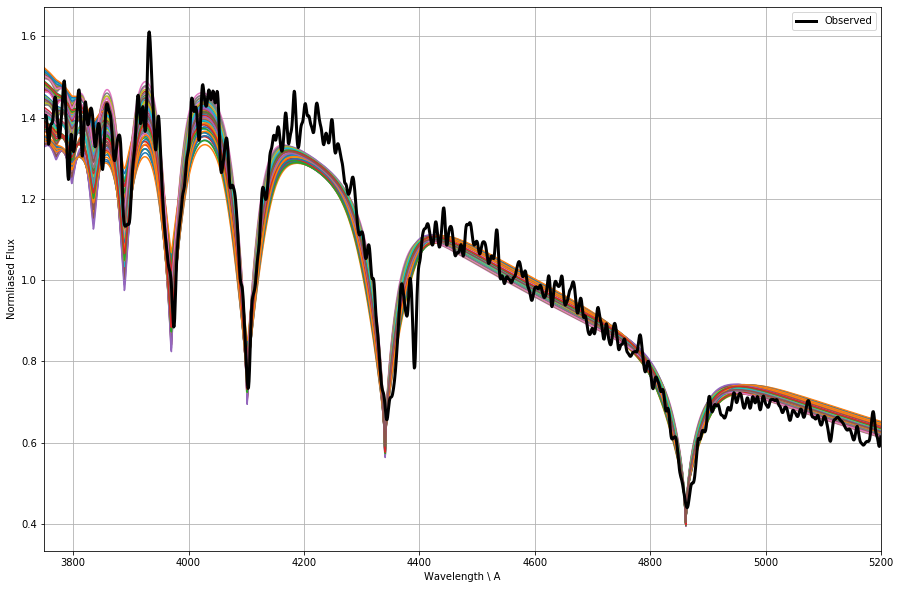

In [118]:
# wavelength range to be fitted
wave_min = 3750.
wave_max = 5200.

sq_diff = []
pl.figure(figsize=(15, 10))

for model_wave, model_flux in zip(model_wave_spec_da, model_flux_spec_da):
    # Resample the model resoltuion to match the observed spectrum
    model_flux_resampled = spectres(wave, model_wave, model_flux, fill=0., verbose=False)
    
    # Masking the range to be fitted
    fitted_range = (wave > wave_min) & (wave < wave_max)
    
    # Compute the sum of the squared difference of the individually normalised model and observed spectra
    sq_diff.append(np.sum((model_flux_resampled[fitted_range] / np.median(model_flux_resampled[fitted_range]) - count[fitted_range] / np.median(count[fitted_range]))**2.))
    
    # Plot the model
    pl.plot(wave[fitted_range], model_flux_resampled[fitted_range] / np.median(model_flux_resampled[fitted_range]))

# Plot the DESI spectrum
pl.plot(wave[fitted_range], count[fitted_range] / np.median(count[fitted_range]), label='Observed', color='black', lw=3)

# Other commands to set the plot
pl.xlim(wave_min, wave_max)
pl.legend()
pl.xlabel('Wavelength \ A')
pl.ylabel('Normliased Flux')
pl.grid()

# Unit-weighted least-squared best-fit surface gravity and temperature from the DESI spctrum
arg_min   = np.argmin(sq_diff)
T_desi    = T_spec_da[arg_min]
logg_desi = logg_spec_da[arg_min]

Text(0.5, 1.0, 'TARGET35191335094848528 :   T = 26000.0 K   log(g) = 7.6')

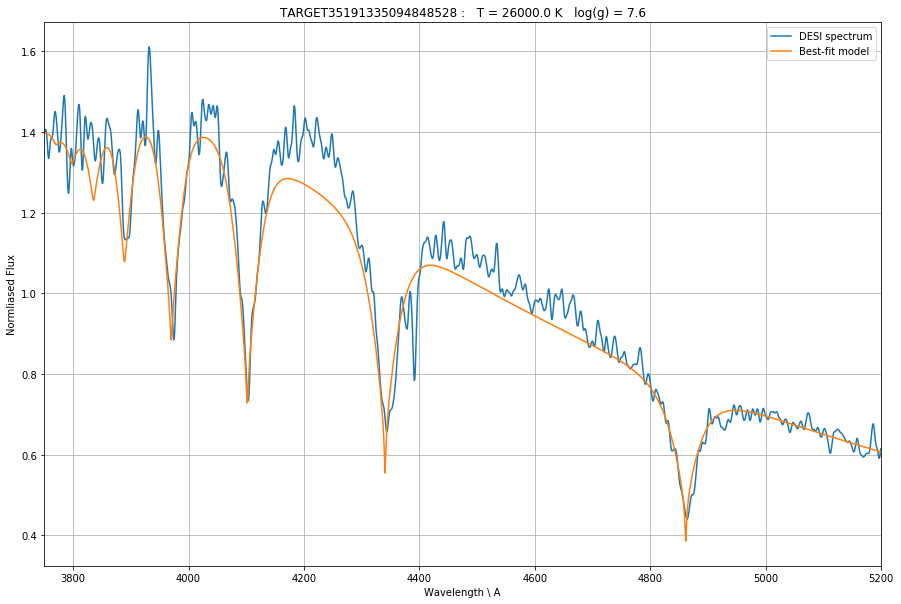

In [119]:
# Plot the best fit only
fitted_range = (model_wave_spec_da[arg_min] > wave_min) & (model_wave_spec_da[arg_min] < wave_max)
fitted_range_data = (wave > wave_min) & (wave < wave_max)

pl.figure(figsize=(15, 10))
pl.plot(wave[fitted_range_data], count[fitted_range_data] / np.median(count[fitted_range_data]), label='DESI spectrum')
pl.plot(model_wave_spec_da[arg_min][fitted_range], model_flux_spec_da[arg_min][fitted_range] / np.median(model_flux_spec_da[arg_min][fitted_range]), label='Best-fit model')
pl.grid()
pl.xlim(wave_min, wave_max)
pl.xlabel('Wavelength \ A')
pl.ylabel('Normliased Flux')
pl.legend()
pl.title('TARGET35191335094848528 :   T = ' + str(T_desi) + ' K   log(g) = ' + str(logg_desi))

## Find the spectroscopic distance

In [120]:
# The expected absolute magnitude in the Gaia colours are
G_desi   = G_interpolator_da(T_desi, logg_desi)
Gbp_desi = Gbp_interpolator_da(T_desi, logg_desi)
Grp_desi = Grp_interpolator_da(T_desi, logg_desi)

# The distance modulus
dist_mod_G_desi   = G_obs   - G_desi
dist_mod_Gbp_desi = Gbp_obs - Gbp_desi
dist_mod_Grp_desi = Grp_obs - Grp_desi

# The medan distance modulus
dist_mod_mean_desi = np.mean((dist_mod_G_desi, dist_mod_Gbp_desi, dist_mod_Grp_desi))

# Converting the distance modulus back to distance
dist_spec = 10.**((dist_mod_mean_desi + 5.) / 5.) 

print('This Spectroscopic distance is %s pc' % dist_spec)

This Spectroscopic distance is 940.4879199247991 pc


## 5. Find the photometric distance

The Gaia photometry are only available in 3 filters, so we can only fit for 2 variables. This is more commonly performed with more filters, but in this demonstration we will stick to the same data set and use the surface gravity found from the spectroscopic fit.

In [121]:
# Define the least-square fucntion
def t_logg_fit(params, obs):
    # Unpack the input
    T, dist = params
    if (dist < 1.) or (T < 2500.) or (T > 1E+5):
        return np.inf
    logg, G_obs, Gbp_obs, Grp_obs, G_obs_err, Gbp_obs_err, Grp_obs_err = obs
    # Get the distance modulus
    dist_mod = 5. * np.log10(dist) - 5.
    # Get the model magnitude and apply the distance modulus
    G_model = G_interpolator_da(T, logg) + dist_mod
    Gbp_model = Gbp_interpolator_da(T, logg) + dist_mod
    Grp_model = Grp_interpolator_da(T, logg) + dist_mod
    # Check finite
    if not (np.isfinite(G_model) & np.isfinite(Gbp_model) & np.isfinite(Grp_model)):
        return np.inf
    else:
        return ((G_model - G_obs)/G_obs_err)**2. + ((Gbp_model - Gbp_obs)/Gbp_obs_err)**2. + ((Grp_model - Grp_obs)/Grp_obs_err)**2.

In [122]:
lsq_solution = optimize.minimize(
    t_logg_fit,
    [25000, 1000.],
    [logg_desi, G_obs, Gbp_obs, Grp_obs, G_obs_err, Gbp_obs_err, Grp_obs_err],
    method='Nelder-Mead')
T_phot = lsq_solution.x[0]
dist_phot = lsq_solution.x[1]

In [123]:
print('Photometric distance from Gaia photometry alone is %s pc' %dist_phot)

Photometric distance from Gaia photometry alone is 820.8206910532908 pc
